# Content with notebooks

You can also create content with Jupyter Notebooks. This means that you can include
code blocks and their outputs in your book.

## Markdown + notebooks

As it is markdown, you can embed images, HTML, etc into your posts!

![](https://myst-parser.readthedocs.io/en/latest/_static/logo-wide.svg)

You can also $add_{math}$ and

$$
math^{blocks}
$$

or

$$
\begin{aligned}
\mbox{mean} la_{tex} \\ \\
math blocks
\end{aligned}
$$

But make sure you \$Escape \$your \$dollar signs \$you want to keep!

## MyST markdown

MyST markdown works in Jupyter Notebooks as well. For more information about MyST markdown, check
out [the MyST guide in Jupyter Book](https://jupyterbook.org/content/myst.html),
or see [the MyST markdown documentation](https://myst-parser.readthedocs.io/en/latest/).

## Code blocks and outputs

Jupyter Book will also embed your code blocks and output in your book.
For example, here's some sample Matplotlib code:

In [13]:
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
import numpy as np
plt.ion()

In [ ]:
# Fixing random state for reproducibility
np.random.seed(19680801)

N = 10
data = [np.logspace(0, 1, 100) + np.random.randn(100) + ii for ii in range(N)]
data = np.array(data).T
cmap = plt.cm.coolwarm
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, N)))


from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                Line2D([0], [0], color=cmap(.5), lw=4),
                Line2D([0], [0], color=cmap(1.), lw=4)]

fig, ax = plt.subplots(figsize=(10, 5))
lines = ax.plot(data)
ax.legend(custom_lines, ['Cold', 'Medium', 'Hot']);

There is a lot more that you can do with outputs (such as including interactive outputs)
with your book. For more information about this, see [the Jupyter Book documentation](https://jupyterbook.org)

In [14]:
from myst_nb import glue
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
plt.rcParams['font.size']=20

#import matplotlib
#matplotlib.use('svg')

Text(0.5, 0, '$k$')

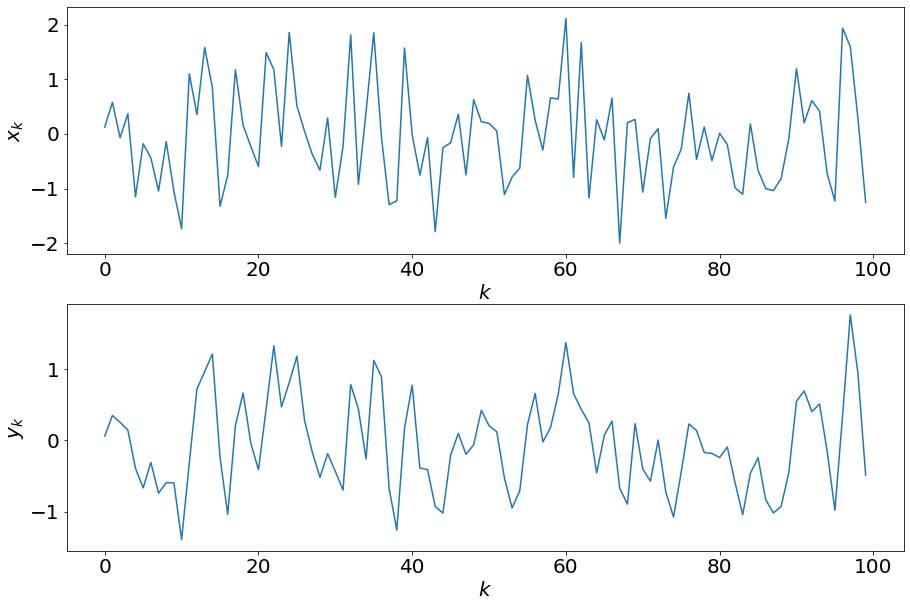

In [12]:
# filtrage en écriture MATRICIELLE
# yk = 1/2 (xk+xk-1)

fig,ax = plt.subplots(2,1,figsize=(15,10))
# 
# longueur du vecteur en entrée 
p = 100                 
# bruit
np.random.seed(2023)
x = np.random.randn(p)   
# on soustrait deux matrices triangulaires pour obtenir une matrice "bande"
H = np.tri(p,p, dtype=int)-np.tri(p,p,-2,dtype=int) 
# on n'oublie pas le facteur
H = 0.5 * H
# produit matriciel:
y = H.dot(x)
# plot
ax[0].plot(x)
ax[0].set_xlabel(r'$k$')
ax[0].set_ylabel(r'$x_k$')
ax[1].plot(y)
ax[1].set_ylabel(r'$y_k$')
ax[1].set_xlabel(r'$k$')
glue("fig_matrix_example_filter", fig, display=False)

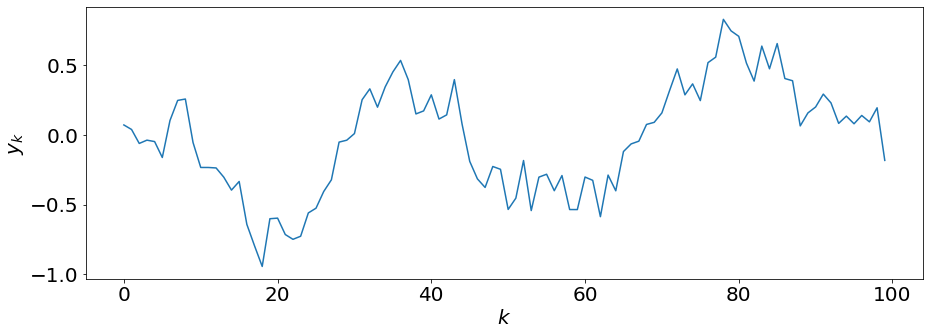

In [10]:
# filtrage en écriture MATRICIELLE
# yk = 1/10 (xk+xk-1+....)

fig,ax = plt.subplots(1,1,figsize=(15,5))
# 
# longueur du vecteur en entrée 
p = 100                 
# bruit
np.random.seed(2023)
x = np.random.randn(p)   
# on soustrait deux matrices triangulaires pour obtenir une matrice "bande"
H = np.tri(p,p, dtype=int)-np.tri(p,p,-10,dtype=int) 
# on n'oublie pas le facteur
H = 0.1 * H
# produit matriciel:
y = H.dot(x)
# plot
#ax[0].plot(x)
#ax[0].set_xlabel(r'$k$')
#ax[0].set_ylabel(r'$x_k$')
#ax[1].plot(y)
#ax[1].set_ylabel(r'$y_k$')
#ax[1].set_xlabel(r'$k$')
ax.plot(y)
ax.set_ylabel(r'$y_k$')
ax.set_xlabel(r'$k$')

glue("fig_matrix_example_filter2", fig, display=False)


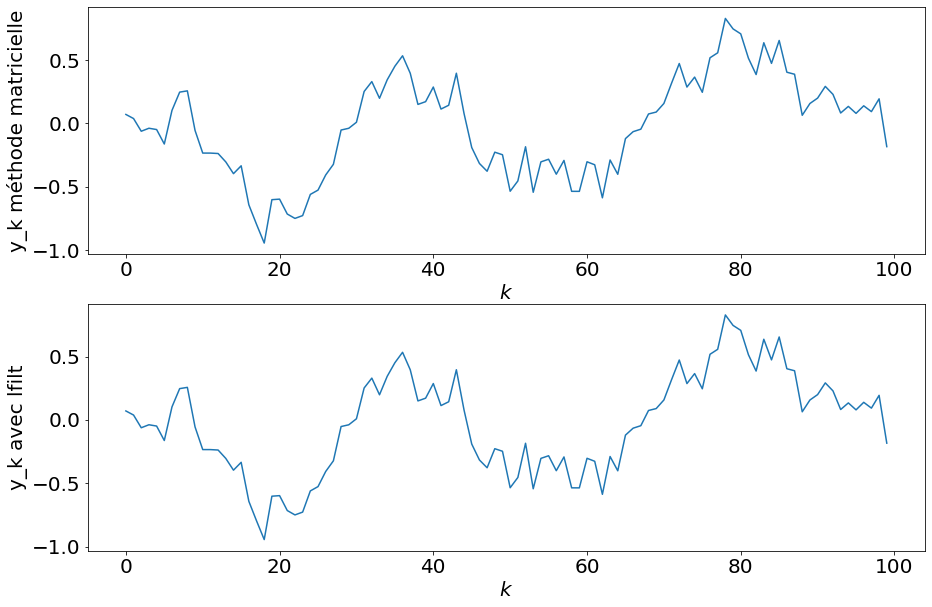

In [7]:
# COMPARE lfilt et méthode matricielle
# FILTRAGE: moyenne mobile

# paramètres du filtre (voir ci-dessus)
a = np.array([1.0])
m = 10
b = 1/m*np.ones(m)

# input= is computed above

# calcul de la sortie
y_lfilt=signal.lfilter(b, a, x)

# plot
fig,ax = plt.subplots(2,1,figsize=(15,10))
ax[0].plot(y)
ax[0].set_xlabel(r'$k$')
ax[0].set_ylabel('y[k] avec matrice')
ax[1].plot(y_lfilt)
ax[1].set_ylabel('y[k] avec lfilt')
ax[1].set_xlabel(r'$k$')
glue("fig_matrix_example_filter3", fig, display=False)


<ipython-input-15-21c20f745847>:46: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax=plt.subplot(gs[i,:8])


"\n# plots in the far right column\nfor i in range(8):\n    ax=plt.subplot(gs[i,8:])\n    ax.set_xticks([]); ax.set_yticks([])\n    ax.set_ylabel(r'$\\omega_{%d}=%d\times\x0crac{2\\pi}{16}$'%(i+8,i+8),fontsize=16,rotation='horizontal')\n    ax.plot(np.real(U[:,i+8]),'-o',color=colors[i+8])\n    ax.plot(np.imag(U[:,i+8]),'--o',color=colors[i+8],alpha=0.2)\n    ax.axis(ymax=4/Nfft*1.1,ymin=-4/Nfft*1.1)\n    ax.yaxis.set_label_position('right')\n    ax.set_xticks(np.arange(16))\n    ax.set_xlabel('n')\n"

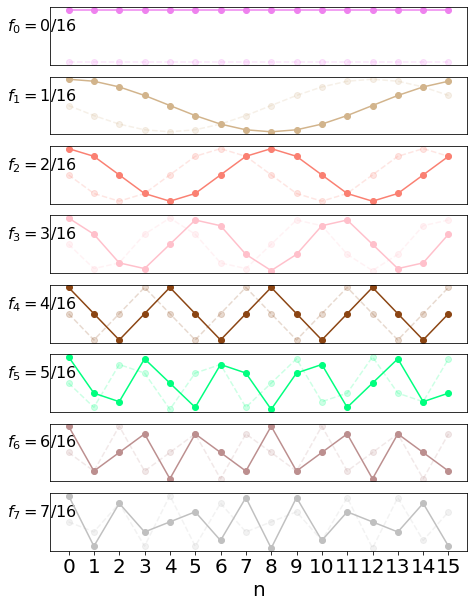

In [15]:
from matplotlib.patches import FancyArrow
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.gridspec as gridspec

def dftmatrix(Nfft=32,N=None):
#’construct DFT matrix’
    k= np.arange(Nfft)
    if N is None: N = Nfft
    n = np.arange(N)
    return np.matrix(np.exp(-1j* 2*np.pi/Nfft *k*n[:,None])) # use numpy broadcasting to
     
Nfft=16
v = np.ones((16,1))
U = dftmatrix(Nfft=Nfft,N=16)
# ---
# hardcoded constants to format complicated figure
gs = gridspec.GridSpec(8,12)
gs.update( wspace=1, left=0.01)

fig =plt.figure(figsize=(10,10))
ax0 = plt.subplot(gs[:,:3])
fig.add_subplot(ax0)

ax0.set_aspect(1)
a=2*np.pi/Nfft*np.arange(Nfft)

colors = ['k','b','r','m','g','Brown','DarkBlue','Tomato','Violet', 'Tan',
'Salmon','Pink','SaddleBrown', 'SpringGreen', 'RosyBrown','Silver',]

for j,i in enumerate(a):
    ax0.add_patch(FancyArrow(0,0,np.cos(i),np.sin(i),width=0.02,length_includes_head=True,edgecolor=colors[j]))

ax0.text(1,0.1,'0',fontsize=16)
ax0.text(0.1,1,r'$\frac{\pi}{2}$',fontsize=22)
ax0.text(-1,0.1,r'$\pi$',fontsize=18)
ax0.text(0.1,-1.2,r'$\frac{3\pi}{2}$',fontsize=22)
ax0.axis(np.array([-1,1,-1,1])*1.45)
ax0.set_title('Radial Frequency',fontsize=18)
ax0.set_xlabel('Real')
ax0.set_ylabel('Imaginary')


# plots in the far right column
for i in range(8):
    ax=plt.subplot(gs[i,:8])
    ax.set_xticks([]); ax.set_yticks([])
    #ax.set_ylabel(r'$\omega_{%d}=%d\times\frac{2\pi}{16}$'%(i+8,i+8),fontsize=16,rotation='horizontal')
    ax.set_ylabel(r'$f_{%d}=%d / 16$'%(i,i),fontsize=16,rotation='horizontal')
    ax.plot(np.real(U[:,i]),'-o',color=colors[i+8])
    ax.plot(np.imag(U[:,i]),'--o',color=colors[i+8],alpha=0.2)
   # ax.axis(ymax=4/Nfft*1.1,ymin=-4/Nfft*1.1)
    ax.yaxis.set_label_position('left')
    if i==7: ax.set_xticks(np.arange(16))
    ax.set_xlabel('n')
    
glue("fig_matrix_example_DFT", fig, display=False)
    
"""
# plots in the far right column
for i in range(8):
    ax=plt.subplot(gs[i,8:])
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_ylabel(r'$\omega_{%d}=%d\times\frac{2\pi}{16}$'%(i+8,i+8),fontsize=16,rotation='horizontal')
    ax.plot(np.real(U[:,i+8]),'-o',color=colors[i+8])
    ax.plot(np.imag(U[:,i+8]),'--o',color=colors[i+8],alpha=0.2)
    ax.axis(ymax=4/Nfft*1.1,ymin=-4/Nfft*1.1)
    ax.yaxis.set_label_position('right')
    ax.set_xticks(np.arange(16))
    ax.set_xlabel('n')
"""        

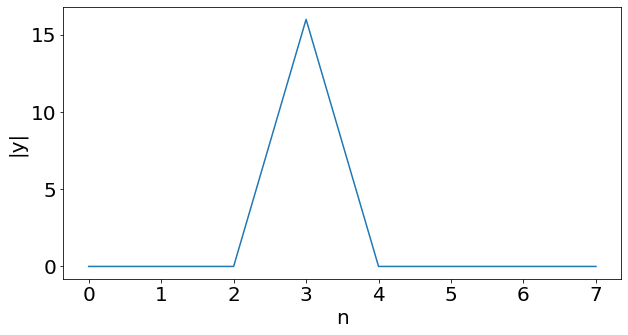

In [55]:
# EXEMPLE 3 : TFD
N=16
k=3
n = np.arange(N)                        # [0,...,15]
x = np.exp(1j* 2*np.pi/N *k *n)  # x est le conjugué de u_3 
y=U.dot(x)
y_module = np.abs(y)   # np.abs calcule le module si y complexe
y_module =np.array(y_module).flatten()
fig,ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(y_module[0:8])
ax.set_xlabel("n")
ax.set_ylabel("|y|")
glue("fig_matrix_example_DFT_2", fig, display=False)


In [56]:
y_module

array([1.17100902e-15, 1.39110546e-15, 2.27866345e-15, 1.60000000e+01,
       1.20088981e-15, 2.66915718e-15, 1.22759996e-14, 2.02500084e-14,
       1.09052218e-14, 5.01570208e-15, 4.09580519e-15, 7.52225038e-16,
       1.29896094e-14, 5.17892564e-15, 3.05225025e-14, 1.74323577e-14])

In [9]:
np.tri(6,6, dtype=int)-np.tri(6,6,-2,dtype=int)

array([[1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 1]])

<ipython-input-21-811fe9b384af>:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax[0,0].stem(x,y)
<ipython-input-21-811fe9b384af>:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax[0,1].stem(x,y)
<ipython-input-21-811fe9b384af>:28: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_li

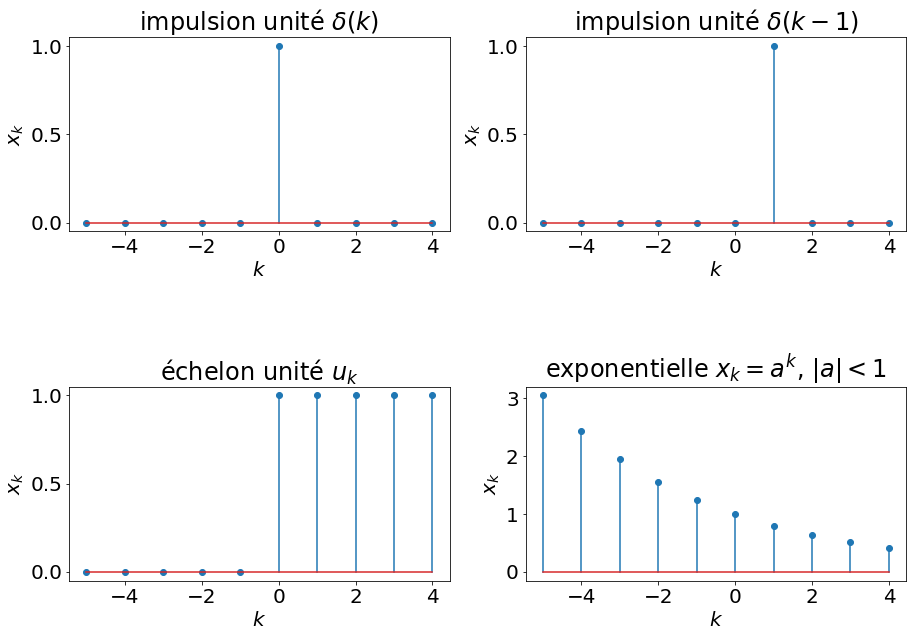

In [21]:
# SIGNAUX de base


fig,ax = plt.subplots(2,2,figsize=(15,10))
# impulsion
y = np.zeros(10); y[5]=1
x= range(-5,5)

ax[0,0].stem(x,y)
ax[0,0].set_xlabel(r'$k$')
ax[0,0].set_ylabel(r'$x_k$')
ax[0,0].set_title('impulsion unité $\delta(k)$')

# impulsion
y = np.zeros(10); y[6]=1
x= range(-5,5)

ax[0,1].stem(x,y)
ax[0,1].set_xlabel(r'$k$')
ax[0,1].set_ylabel(r'$x_k$')
ax[0,1].set_title('impulsion unité $\delta(k-1)$')


# échelon
y = np.zeros(10); y[5:]=1
x= range(-5,5)

ax[1,0].stem(x,y)
ax[1,0].set_xlabel(r'$k$')
ax[1,0].set_ylabel(r'$x_k$')
ax[1,0].set_title('échelon unité $u_k$')

# exponentielle/géométrique
a=0.8
x= np.arange(-5,5)
y = a**x

ax[1,1].stem(x,y)
ax[1,1].set_xlabel(r'$k$')
ax[1,1].set_ylabel(r'$x_k$')
ax[1,1].set_title('exponentielle $x_k=a^k$, $|a|<1$')


plt.subplots_adjust(hspace=0.8)
glue("fig_signal_elementary", fig, display=False)

<ipython-input-29-25a9c31eb6a3>:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax[0].stem(x)
<ipython-input-29-25a9c31eb6a3>:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax[1].stem(y)


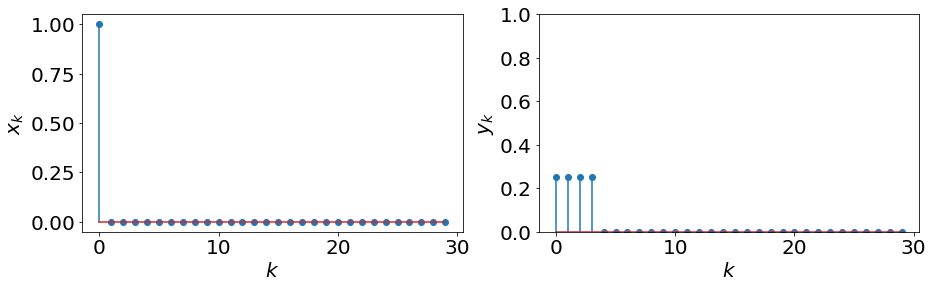

In [29]:
# FILTRAGE: moyenne mobile
# input= Dirac
#https://jupyterbook.org/en/stable/content/executable/output-insert.html?highlight=glue#the-glue-role-directive
x = np.array([1., 0., 0., 0.])

a = np.array([1.0])

m = 4
b = 1/m*np.ones(m)

x = np.zeros(30); x[0]=1

y=signal.lfilter(b, a, x)
fig,ax = plt.subplots(1,2,figsize=(15,4))
ax[0].stem(x)
ax[0].set_xlabel(r'$k$')
ax[0].set_ylabel(r'$x_k$')
ax[1].stem(y)
ax[1].set_ylabel(r'$y_k$')
ax[1].set_xlabel(r'$k$')
ax[1].set_ylim([0,1])
plt.subplots_adjust(hspace=0.8)
glue("fig_filter_sliding_window", fig, display=False)

<ipython-input-32-cdc58ab49bdb>:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax[0].stem(x)
<ipython-input-32-cdc58ab49bdb>:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax[1].stem(y)


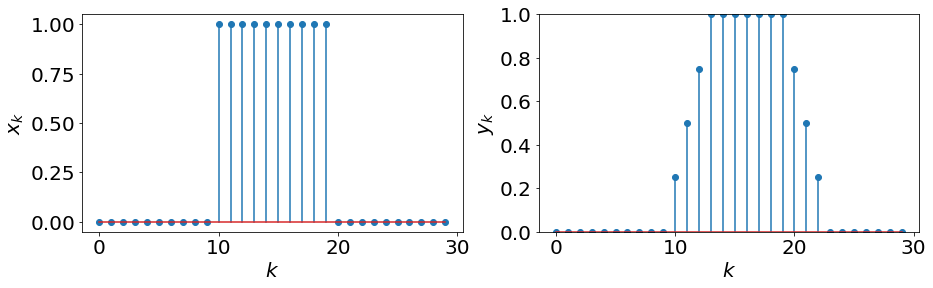

In [32]:
# FILTRAGE: moyenne mobile
# input= créneau
#https://jupyterbook.org/en/stable/content/executable/output-insert.html?highlight=glue#the-glue-role-directive
x = np.array([1., 0., 0., 0.])

a = np.array([1.0])

m = 4
b = 1/m*np.ones(m)

x = np.zeros(30); x[10:20]=1

y=signal.lfilter(b, a, x)
fig,ax = plt.subplots(1,2,figsize=(15,4))
ax[0].stem(x)
ax[0].set_xlabel(r'$k$')
ax[0].set_ylabel(r'$x_k$')
ax[1].stem(y)
ax[1].set_ylabel(r'$y_k$')
ax[1].set_xlabel(r'$k$')
ax[1].set_ylim([0,1])
plt.subplots_adjust(hspace=0.8)
glue("fig_filter_sliding_window_gate", fig, display=False)

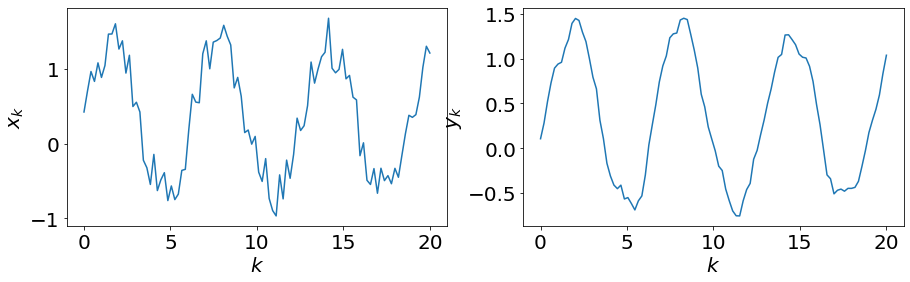

In [39]:
# FILTRAGE: moyenne mobile
# input= sinus + bruit
#https://jupyterbook.org/en/stable/content/executable/output-insert.html?highlight=glue#the-glue-role-directive
x = np.array([1., 0., 0., 0.])

a = np.array([1.0])

m = 4
b = 1/m*np.ones(m)

n=100
t=np.linspace(0,20,n)
x = np.sin(t)+0.7*np.random.rand(n)

y=signal.lfilter(b, a, x)
fig,ax = plt.subplots(1,2,figsize=(15,4))
ax[0].plot(t,x)
ax[0].set_xlabel(r'$k$')
ax[0].set_ylabel(r'$x_k$')
ax[1].plot(t,y)
ax[1].set_ylabel(r'$y_k$')
ax[1].set_xlabel(r'$k$')
#ax[1].set_ylim([0,1])
plt.subplots_adjust(hspace=0.8)
glue("fig_filter_sliding_window_sine", fig, display=False)

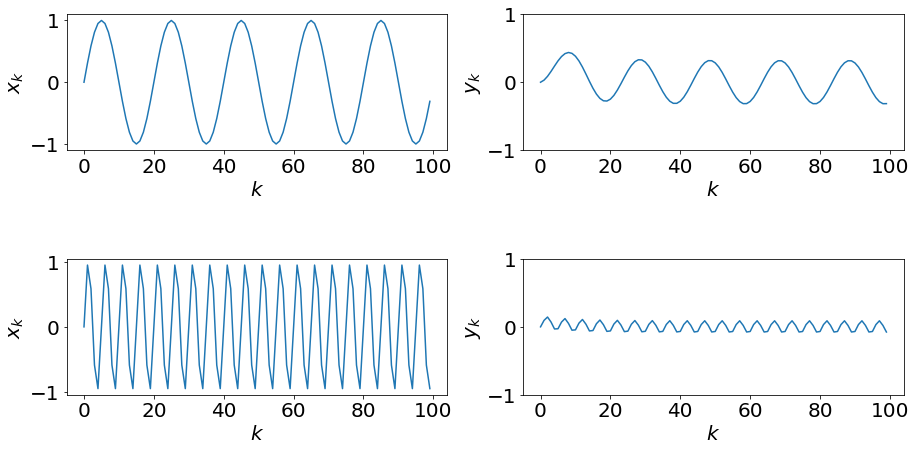

In [30]:
# FILTRAGE: passe bas
# input= sinus

a = np.array([1.0, -0.9])
b = np.array([.1])

n=100
t=np.arange(n)

fig,ax = plt.subplots(2,2,figsize=(15,7))
w_l = [2*np.pi*0.05,2*np.pi*0.2]

i=0
for w in w_l:
    x = np.sin(w *t) #+0.7*np.random.rand(n)
    y=signal.lfilter(b, a, x)
    
    ax[i,0].plot(t,x)
    ax[i,0].set_xlabel(r'$k$')
    ax[i,0].set_ylabel(r'$x_k$')
    ax[i,1].plot(t,y)
    ax[i,1].set_ylabel(r'$y_k$')
    ax[i,1].set_xlabel(r'$k$')
    ax[i,1].set_ylim([-1,1])
    i+=1 


plt.subplots_adjust(hspace=0.8)
plt.show()
glue("fig_filter_lowpass", fig, display=False)

Text(0.5, 0, 'Frequency [rad/sample]')

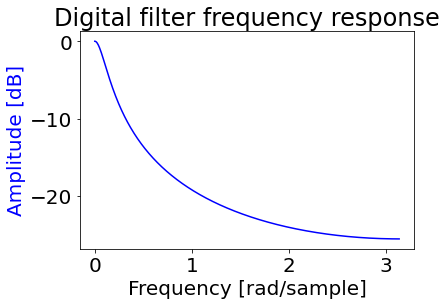

In [14]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html#scipy.signal.freqz
w, h = signal.freqz(b,a)
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
glue("fig_filter_lowpass_freqz", fig, display=False)

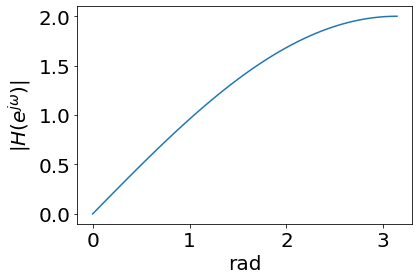

In [4]:
# FILTRE DERIVATEUR
fig, ax = plt.subplots()
x= np.linspace(0,np.pi)
ax.plot(x , 2*np.sin(x/2))
ax.set_xlabel('rad')
ax.set_ylabel(r'$\vert H(e^{j\omega})\vert$')
glue("fig_filter_derivative", fig, display=False)